In [4]:
fname='/Users/mgrecu/GPM/PMMPoster/KuoTables/simulatedZ_impacts2020_Kuo.nc'
import netCDF4 as nc
with nc.Dataset(fname) as f:
    psdData=f.variables['psd_Data'][:]

Nw=psdData[:,0]
T=psdData[:,4]



In [19]:
print(T.min(),T.max())
print(psdData[0,:])
import numpy as np
nwL=[]
tempL=[]
for i in range(1,10):
    a=np.nonzero((T>-(i+1)*3) & (T<-(i)*3))
    if len(a[0])>0:
        nwL.append(np.log10(Nw[a[0]]/0.08).mean())
        tempL.append(T[a[0]].mean())

-32.74 -1.0
[ 4.27044939e+01  2.79120567e-01  3.18090606e-01  1.24109492e-01
 -1.48000000e+00  1.50351181e+01  4.45930258e-04  1.02677936e-04
  2.96189846e-05  2.33543571e-02  1.30214539e+01  6.74610026e-03
  1.55332708e-03  1.11040345e-03  1.24770388e-01  7.81358480e+00
  1.39419407e-01  3.21020968e-02  2.91414484e-02  3.60077888e-01]


[-4.488952774305744, -7.370303909379749, -10.621371566202319, -13.41689898580122, -16.524484796257543, -19.77125433812593, -21.912189542483656, -25.312972639881686, -28.153008742107822]
[-0.02470483  1.10636187]
[[ 1.         -0.78210696]
 [-0.78210696  1.        ]]


(array([1.5397e+04, 4.5218e+04, 2.3466e+04, 8.7280e+03, 2.7690e+03,
        8.7500e+02, 1.4400e+02, 2.5000e+01, 1.0000e+01, 3.0000e+00]),
 array([0.04304711, 0.34362551, 0.64420391, 0.94478231, 1.2453607 ,
        1.5459391 , 1.8465175 , 2.1470959 , 2.4476743 , 2.7482527 ,
        3.04883109]),
 <BarContainer object of 10 artists>)

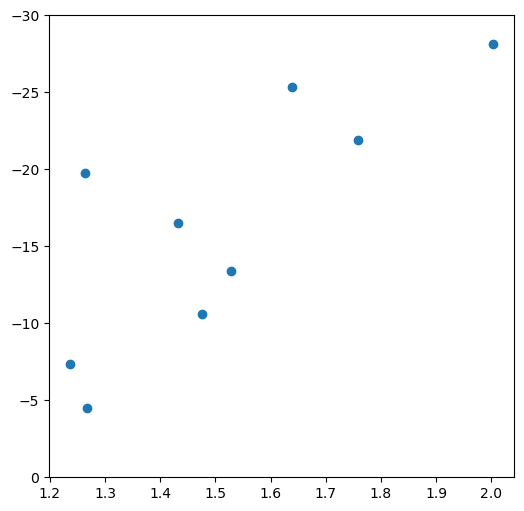

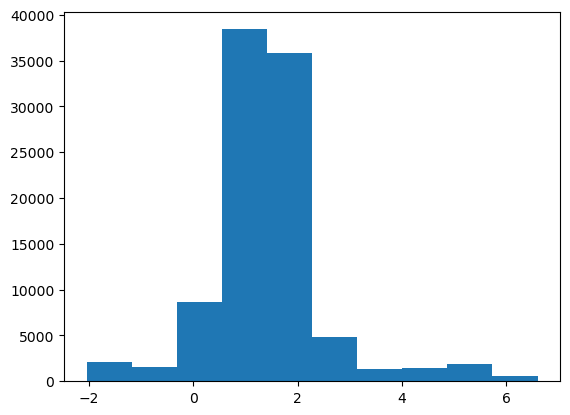

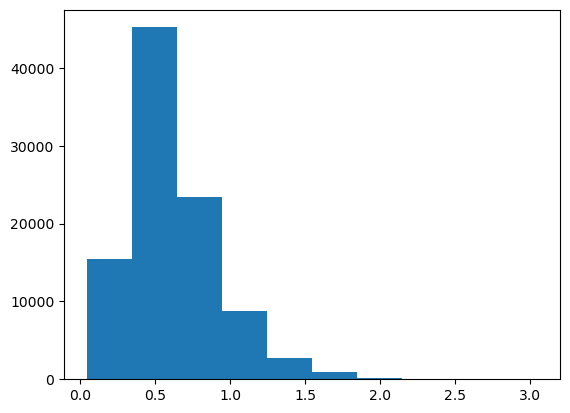

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(nwL,tempL,'o')
plt.ylim(0,-30)
print(tempL)
coeffs=np.polyfit((tempL),(nwL),1)
print(coeffs)
plt.figure()
print(np.corrcoef(tempL,nwL))
plt.hist(np.log10(Nw/0.08))
plt.figure()
plt.hist(psdData[:,1])